In [1]:
!pip freeze > requirements.txt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data cleaning and seperating(auto-manual)

In [4]:
df = pd.read_csv('toolwindow_data.csv')

In [5]:
df.sort_values(['user_id', 'timestamp'], inplace=True)

In [6]:
df['next_event'] = df.groupby('user_id')['event'].shift(-1)
df['closed_time'] = df.groupby('user_id')['timestamp'].shift(-1)

# Droping invalid sessions: keep only rows where an open has a corresponding close

In [7]:
df = df[(df['event'] == 'opened') & (df['next_event'] == 'closed')]

# Separating auto sessions from manual sessions

In [8]:
auto_opened_frame = df[df['open_type'] == 'auto']
manual_opened_frame = df[df['open_type'] == 'manual']

In [9]:
auto_opened_frame.head(3)

,timestamp,event,open_type,user_id,next_event,closed_time
3481,1751826102123,opened,auto,1,closed,1.751827e+12
71,1751656141008,opened,auto,2,closed,1.751656e+12
1717,1752240576228,opened,auto,3,closed,1.752242e+12


In [10]:
manual_opened_frame.head(3)

,timestamp,event,open_type,user_id,next_event,closed_time
2757,1751841258635,opened,manual,1,closed,1.751850e+12
1296,1751985487772,opened,manual,1,closed,1.751987e+12
0,1752250204033,opened,manual,1,closed,1.752250e+12


# Counting total_time for each session

In [11]:
auto_opened_frame['total_time'] = auto_opened_frame['closed_time'] - auto_opened_frame['timestamp']

In [12]:
manual_opened_frame['total_time'] = manual_opened_frame['closed_time'] - manual_opened_frame['timestamp']

# Converting milliseconds to seconds

In [13]:
auto_opened_frame['total_time'] = auto_opened_frame['total_time'] / 1000

In [14]:
manual_opened_frame['total_time'] = manual_opened_frame['total_time'] / 1000

In [15]:
auto_opened_frame.head(3)

,timestamp,event,open_type,user_id,next_event,closed_time,total_time
3481,1751826102123,opened,auto,1,closed,1.751827e+12,643.954
71,1751656141008,opened,auto,2,closed,1.751656e+12,58.624
1717,1752240576228,opened,auto,3,closed,1.752242e+12,1419.640


In [16]:
manual_opened_frame.head(3)

,timestamp,event,open_type,user_id,next_event,closed_time,total_time
2757,1751841258635,opened,manual,1,closed,1.751850e+12,8285.974
1296,1751985487772,opened,manual,1,closed,1.751987e+12,1136.113
0,1752250204033,opened,manual,1,closed,1.752250e+12,0.748


# Duration Statistics

In [17]:
auto_opened_frame['total_time'].describe()

count      1000.000000
mean       6323.446365
std       28626.912755
min           0.154000
25%          35.195500
50%         184.820500
75%        1195.736750
max      409873.748000
Name: total_time, dtype: float64

In [18]:
manual_opened_frame['total_time'].describe()

count       622.000000
mean       1470.259863
std       10725.427369
min           0.015000
25%           2.151250
50%          12.059000
75%         135.663750
max      180918.694000
Name: total_time, dtype: float64

# Visualizations

In [19]:
combined_data = pd.concat([auto_opened_frame, manual_opened_frame])

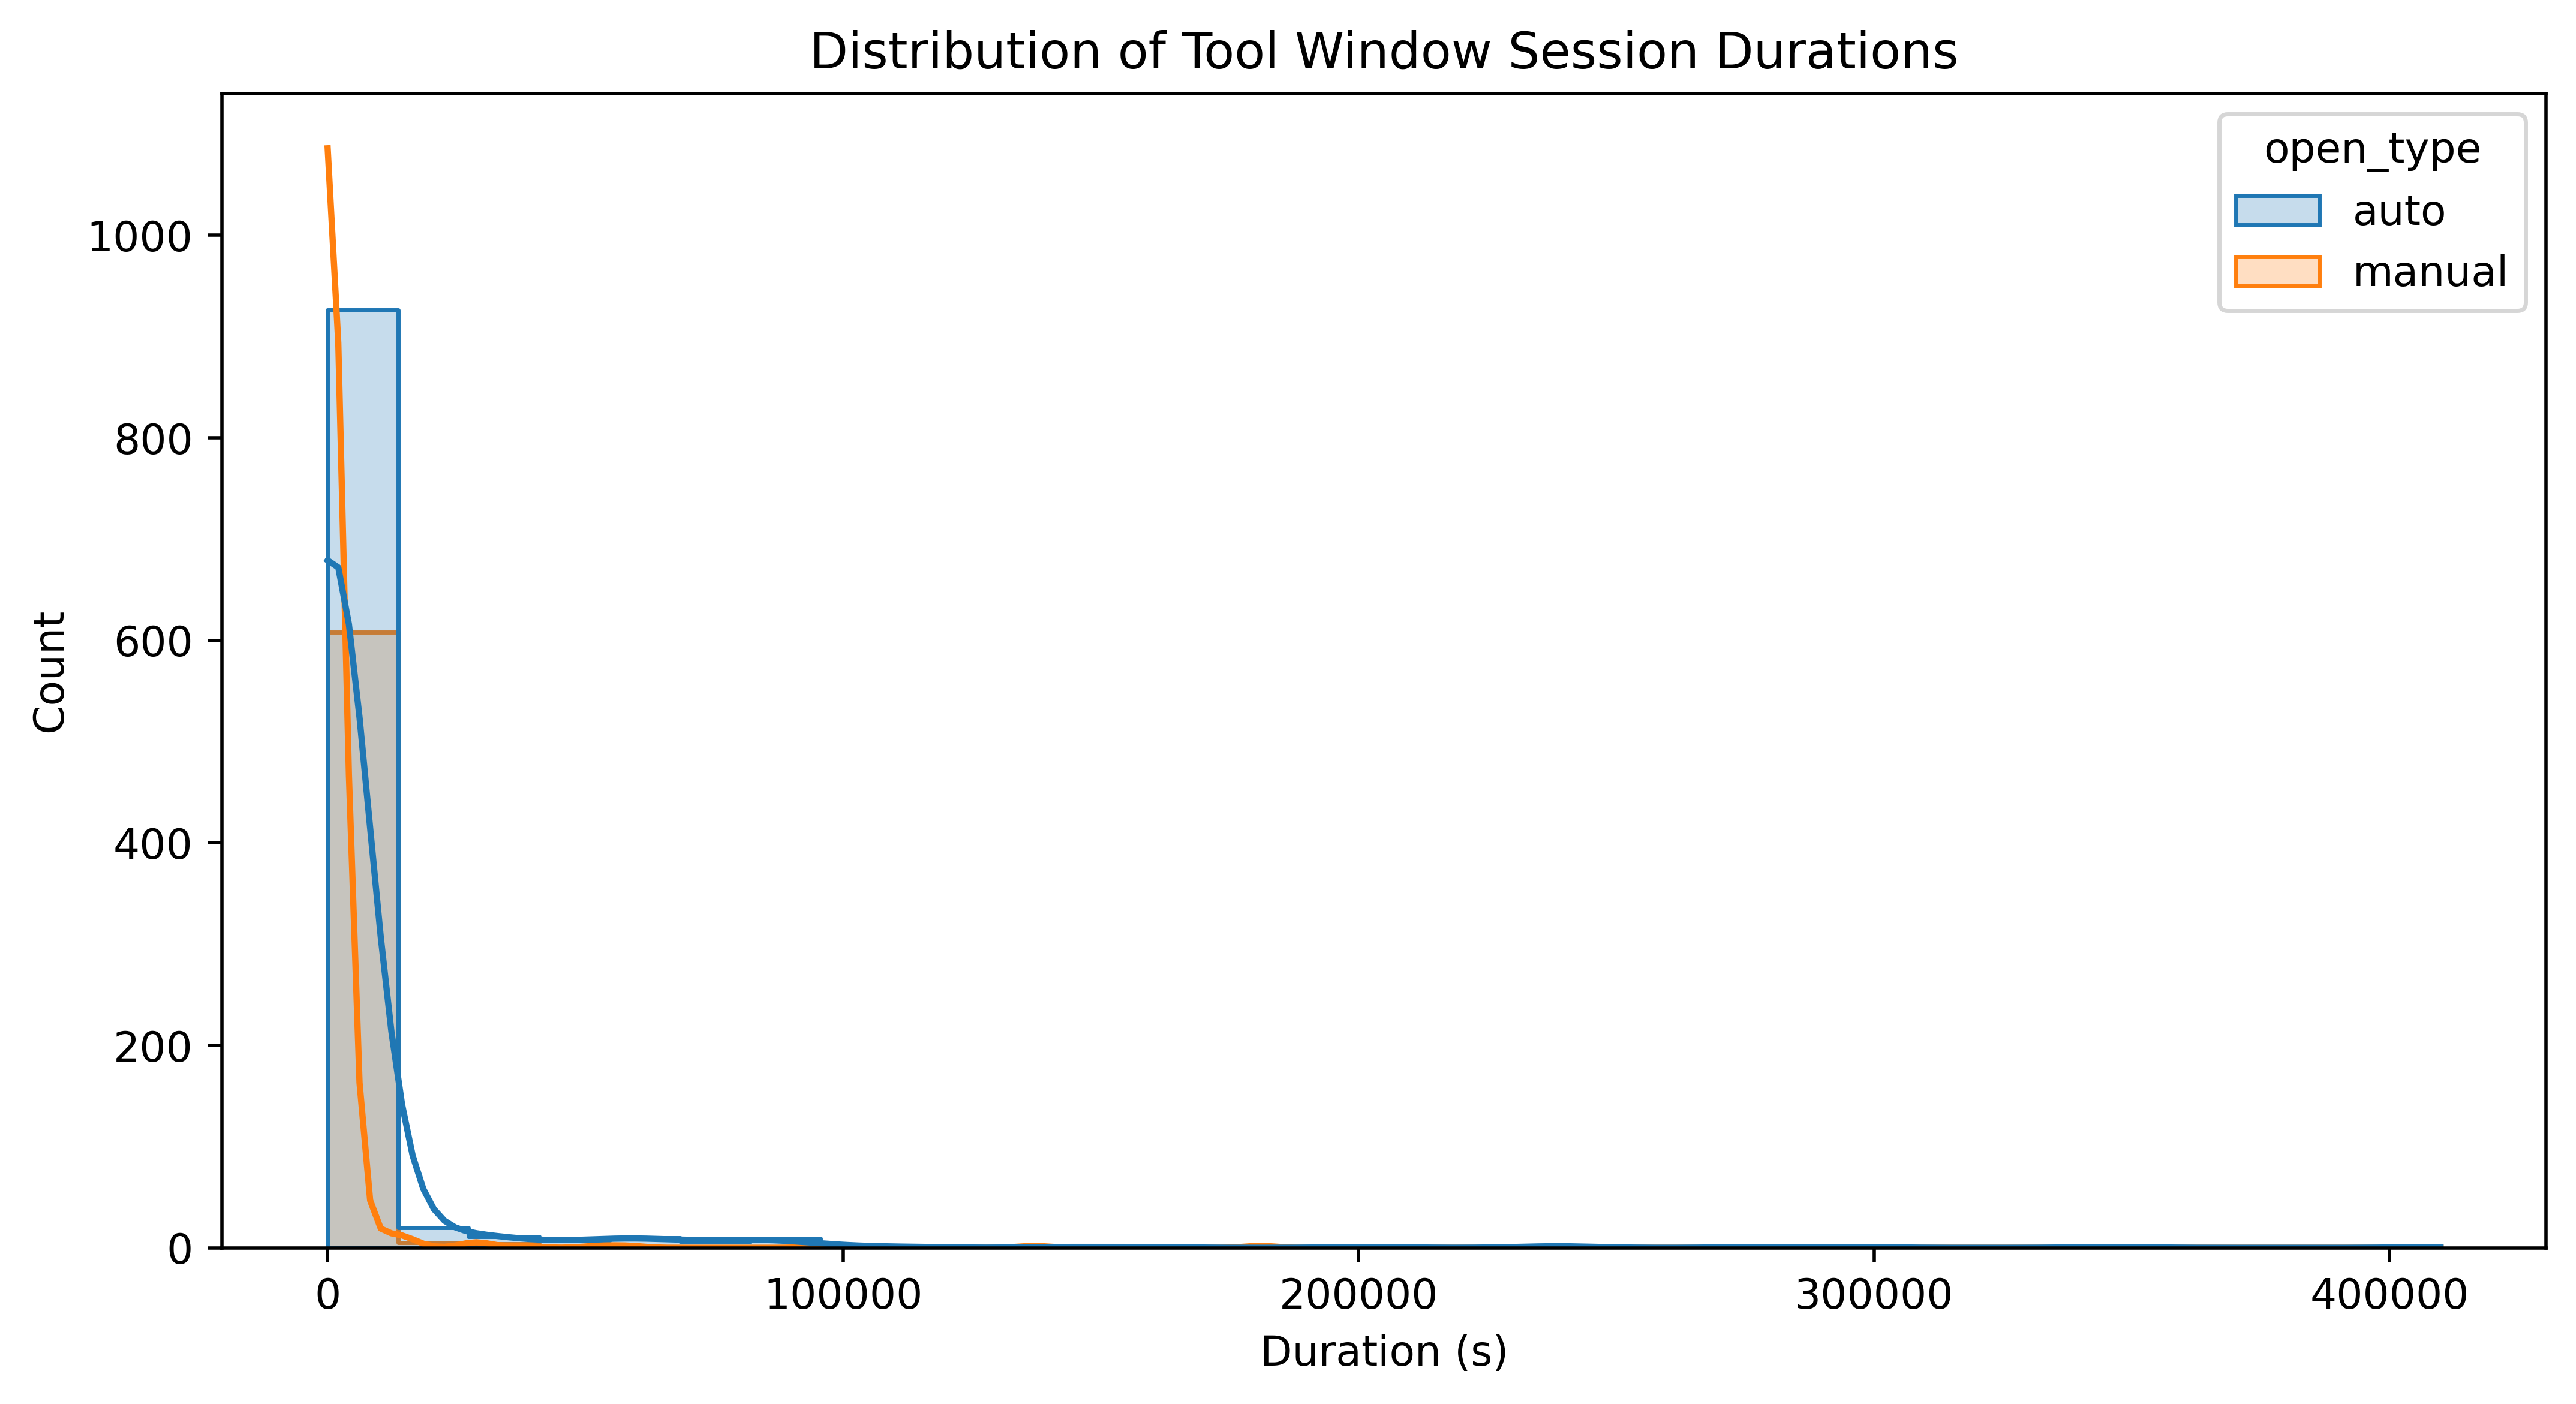

In [20]:
plt.figure(figsize=(10, 5), dpi=500)
sns.histplot(data=combined_data, x='total_time', hue='open_type', bins=30, kde=True, element='step')
plt.title("Distribution of Tool Window Session Durations")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.show()

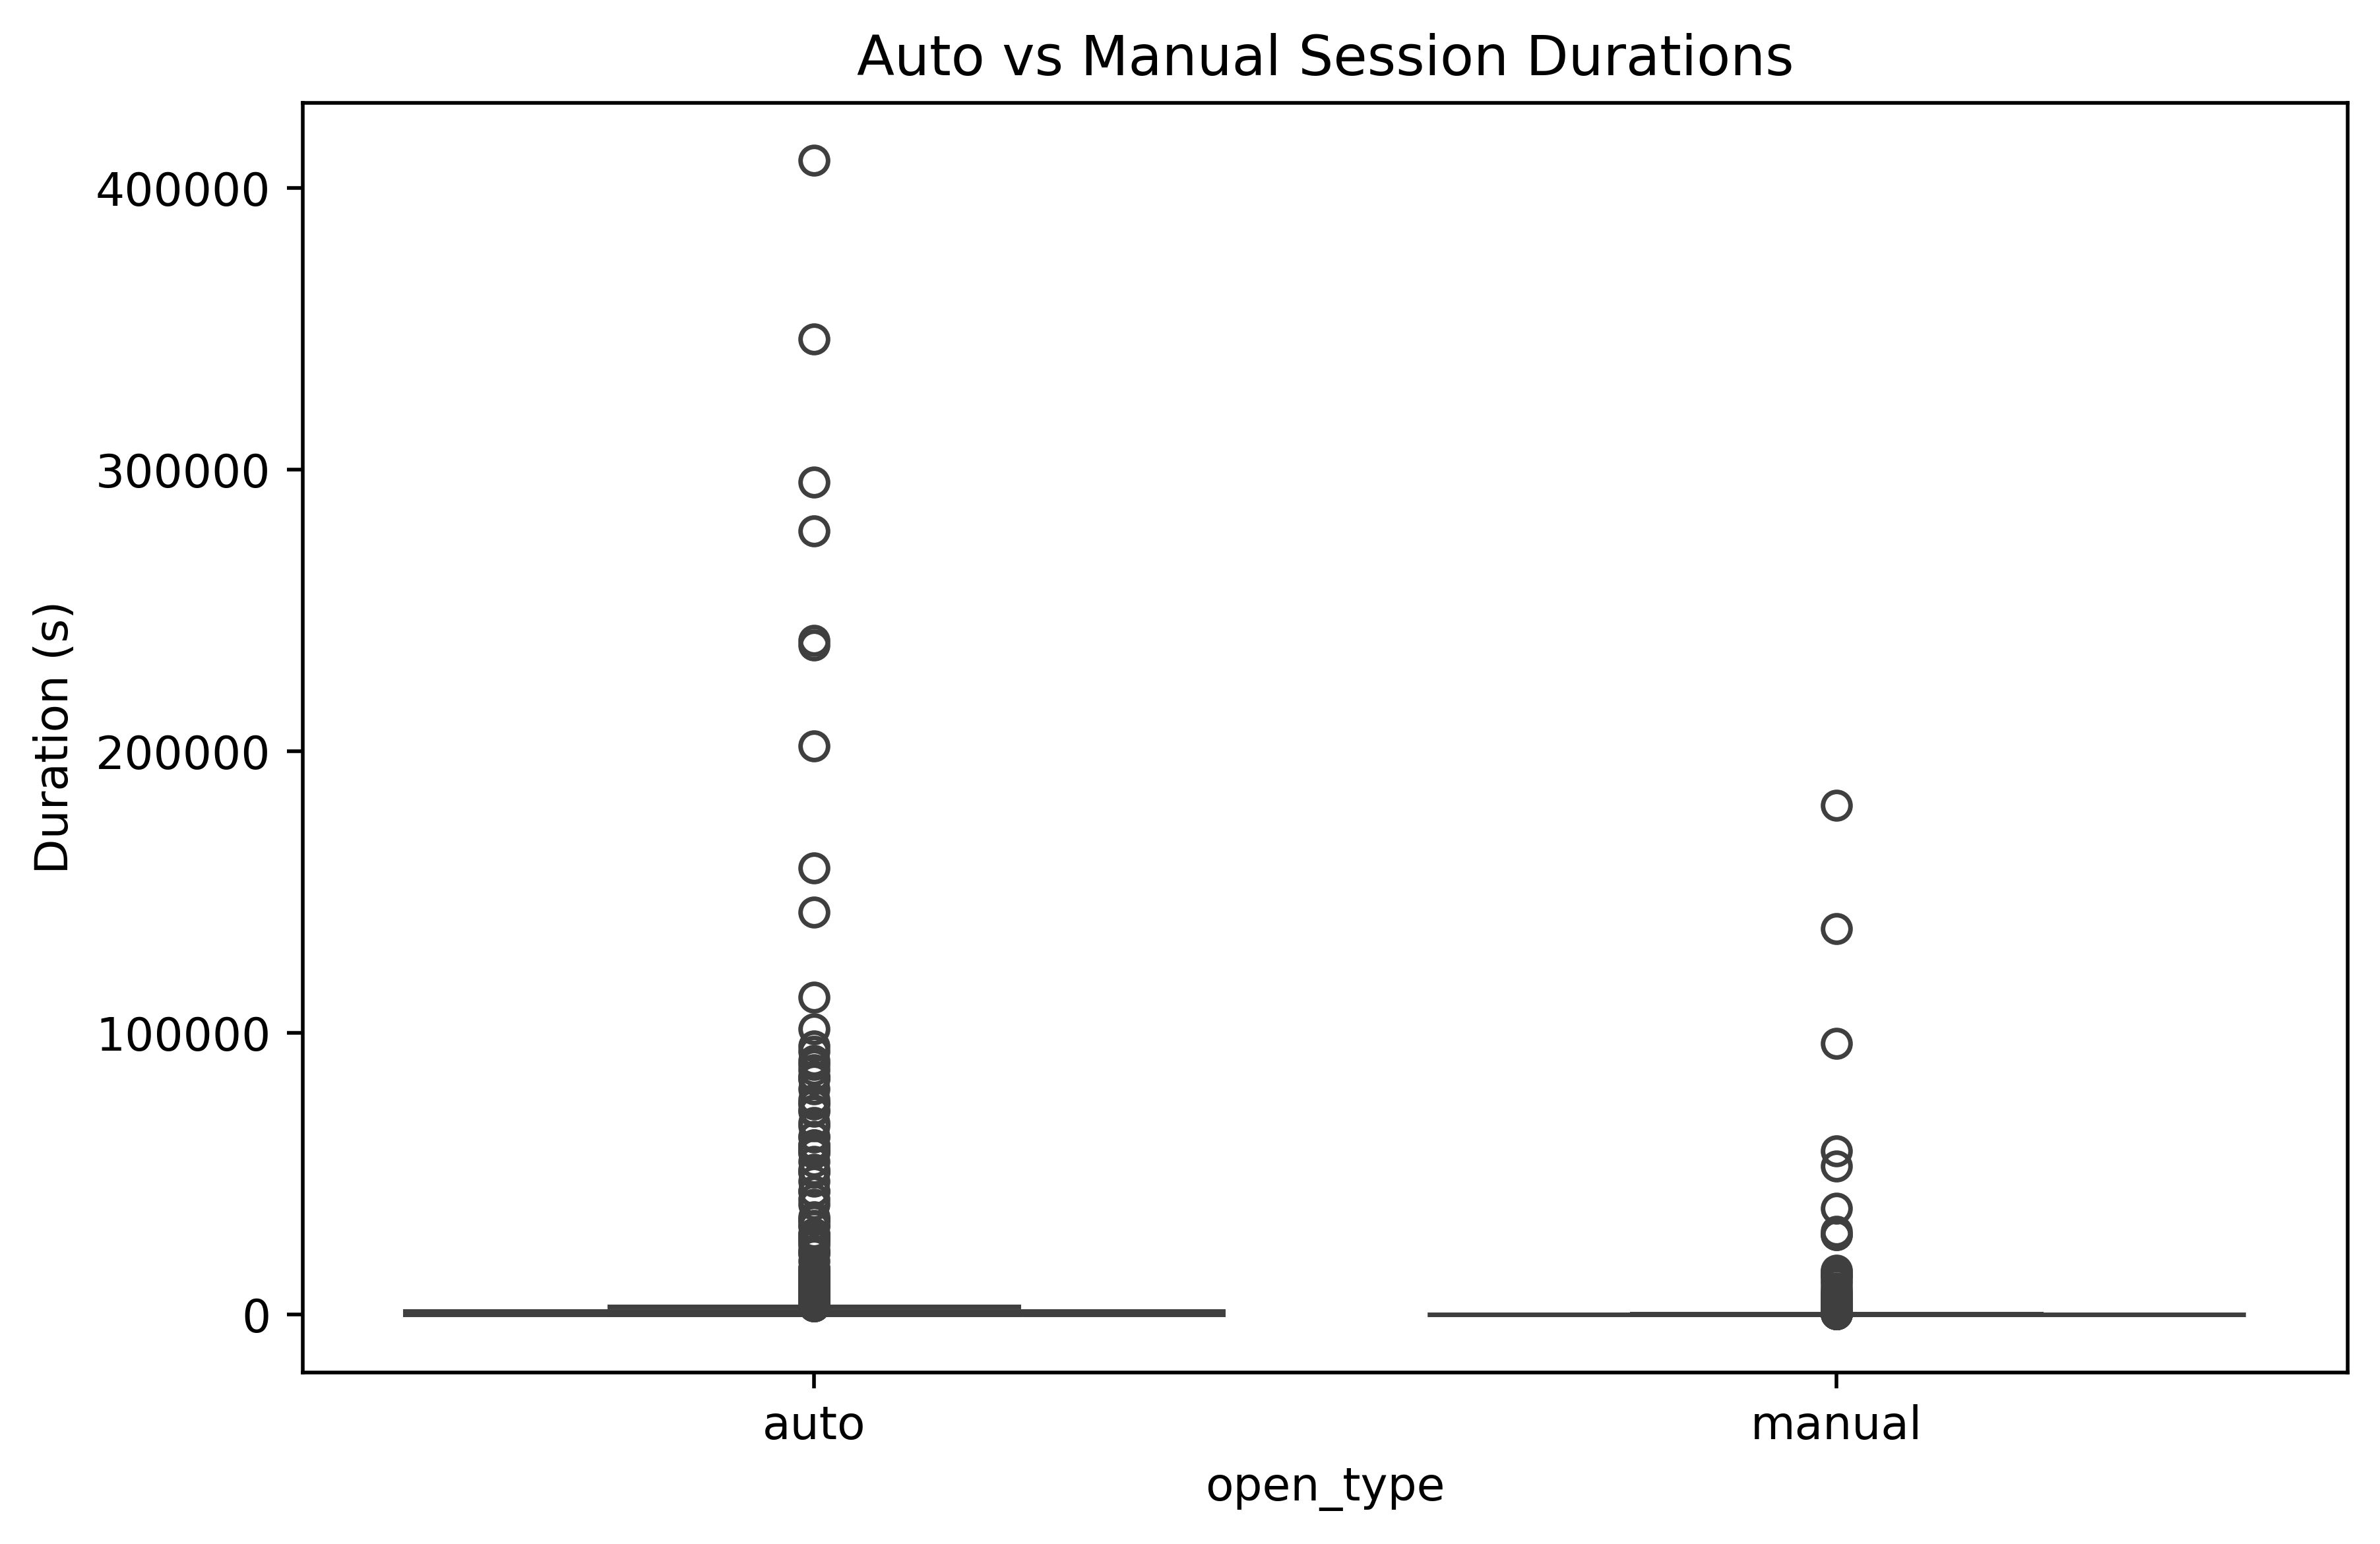

In [21]:
plt.figure(figsize=(8,5), dpi=500)
sns.boxplot(x='open_type', y='total_time', data=combined_data)
plt.title("Auto vs Manual Session Durations")
plt.ylabel("Duration (s)")
plt.show()

# Top 5 longest auto session

In [22]:
display(auto_opened_frame.nlargest(5, 'total_time'))

,timestamp,event,open_type,user_id,next_event,closed_time,total_time
107,1752673741911,opened,auto,56,closed,1.753084e+12,409873.748
1925,1752119319488,opened,auto,74,closed,1.752466e+12,346329.981
1492,1752474997479,opened,auto,7,closed,1.752771e+12,295707.874
179,1752147967168,opened,auto,77,closed,1.752426e+12,278184.279
1447,1752842216104,opened,auto,43,closed,1.753082e+12,239314.469


# Top 5 longest manual session

In [23]:
display(manual_opened_frame.nlargest(5, 'total_time'))

,timestamp,event,open_type,user_id,next_event,closed_time,total_time
504,1752769126201,opened,manual,114,closed,1.752950e+12,180918.694
1930,1752104966112,opened,manual,24,closed,1.752242e+12,137091.081
3295,1751965327072,opened,manual,5,closed,1.752062e+12,96223.928
2345,1752165719667,opened,manual,91,closed,1.752224e+12,58224.159
3059,1752316662543,opened,manual,64,closed,1.752369e+12,52725.404


# Top 5 shortest auto session

In [24]:
display(auto_opened_frame.nsmallest(5, 'total_time'))

,timestamp,event,open_type,user_id,next_event,closed_time,total_time
1217,1752669572249,opened,auto,12,closed,1.752670e+12,0.154
2230,1751965323904,opened,auto,5,closed,1.751965e+12,0.461
138,1751596255839,opened,auto,67,closed,1.751596e+12,1.344
1932,1752957658498,opened,auto,15,closed,1.752958e+12,2.093
847,1752728899435,opened,auto,45,closed,1.752729e+12,2.101


# Top 5 shortest manual session

In [25]:
display(manual_opened_frame.nsmallest(5, 'total_time'))

,timestamp,event,open_type,user_id,next_event,closed_time,total_time
3112,1752165455443,opened,manual,182,closed,1.752165e+12,0.015
319,1751595233952,opened,manual,70,closed,1.751595e+12,0.218
2001,1752487631713,opened,manual,30,closed,1.752488e+12,0.245
2322,1752228874105,opened,manual,30,closed,1.752229e+12,0.246
623,1752039606639,opened,manual,23,closed,1.752040e+12,0.293


# Per user session (auto-manual)

In [26]:
auto_user_summary = auto_opened_frame.groupby('user_id')['total_time'].mean().reset_index()
auto_user_summary.rename(columns = {'total_time': 'avg_auto_time'}, inplace=True)

In [27]:
manual_user_summary = manual_opened_frame.groupby('user_id')['total_time'].mean().reset_index()
manual_user_summary.rename(columns={'total_time': 'avg_manual_time'}, inplace=True)

In [28]:
users_summary = pd.merge(auto_user_summary, manual_user_summary, on='user_id', how='outer')

In [29]:
users_summary.fillna(0, inplace=True)

In [30]:
users_summary

,user_id,avg_auto_time,avg_manual_time
0,1,643.954000,3526.676625
1,2,58.624000,53.363500
2,3,3140.815105,0.000000
3,4,27777.630778,13.592000
4,5,8841.726000,25525.585400
...,...,...,...
192,198,125.748000,0.000000
193,199,0.000000,22.863000
194,200,0.000000,34.045000
195,201,0.000000,8.308000
